In [107]:
import pandas as pd

df = pd.read_csv('/content/german_credit_data.csv', index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Hacer la limpieza de los datos

In [108]:
df_missing = df[df.isnull().any(axis=1)]
print(df_missing)

     Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own             NaN           little           1169   
2     49    male    1     own          little              NaN           2096   
5     35    male    1    free             NaN              NaN           9055   
6     53    male    2     own      quite rich              NaN           2835   
8     61    male    1     own            rich              NaN           3059   
..   ...     ...  ...     ...             ...              ...            ...   
991   34    male    1     own        moderate              NaN           1569   
992   23    male    1    rent             NaN           little           1936   
994   50    male    2     own             NaN              NaN           2390   
995   31  female    1     own          little              NaN           1736   
997   38    male    2     own          little              NaN            804   

     Duration              

In [109]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,NaN,little,1169,6,radio/TV,good
1,22,0,2,own,little,moderate,5951,48,radio/TV,bad
2,49,1,1,own,little,NaN,2096,12,education,good
3,45,1,2,free,little,little,7882,42,furniture/equipment,good
4,53,1,2,free,little,little,4870,24,car,bad


In [110]:
df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,own,NaN,little,1169,6,radio/TV,1
1,22,0,2,own,little,moderate,5951,48,radio/TV,0
2,49,1,1,own,little,NaN,2096,12,education,1
3,45,1,2,free,little,little,7882,42,furniture/equipment,1
4,53,1,2,free,little,little,4870,24,car,0


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [112]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [113]:
from sklearn.compose import ColumnTransformer

t = ColumnTransformer([
    ('numeric', numeric_pipeline, ['Age', 'Credit amount', 'Duration']),
    ('nominal', nominal_pipeline, ['Sex', 'Job', 'Housing','Purpose']),
    ('ordinal', ordinal_pipeline, ['Saving accounts','Checking account'])
])

t

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Credit amount', 'Duration']),
                                ('nominal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['Sex', 'Job', 'Housing', 'Purpose']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 ['Saving accounts', 'Checking account'])])

In [114]:
df_transformed = t.fit_transform(df)
pd.DataFrame(df_transformed)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2.766456,-0.745131,-1.236478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.191404,0.949817,2.248194,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.183312,-0.416562,-0.738668,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.831502,1.634247,1.750384,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.535122,0.566664,0.256953,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,-0.544162,-0.738668,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,0.391740,0.207612,0.754763,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.215835,-0.874503,-0.738668,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,-1.103451,-0.505528,1.999289,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [115]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_modelo = Pipeline([
    ('preprocessor', t),
    ('modelo', KNeighborsClassifier())
])

pipeline_modelo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Credit amount',
                                                   'Duration']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Job', 'Housing',
                                                   'Purpose']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Saving accounts',
                                                   'Checking account'])])),
                ('modelo', KNeighborsClassifier())])

In [116]:
x = df.drop('Risk', axis=1)
y = df['Risk']

modelo = pipeline_modelo.fit(x, y)

modelo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Credit amount',
                                                   'Duration']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Job', 'Housing',
                                                   'Purpose']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Saving accounts',
                                                   'Checking account'])])),
                ('modelo', KNeighborsClassifier())])

In [117]:
modelo.score(x, y)

0.776

Generar un clasification Report con Sklearn

In [118]:
from sklearn.metrics import classification_report

y_pred = modelo.predict(x)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.42      0.53       300
           1       0.79      0.93      0.85       700

    accuracy                           0.78      1000
   macro avg       0.75      0.67      0.69      1000
weighted avg       0.77      0.78      0.76      1000



Generar una matriz de confusion utilizando un mapa de calor

<Axes: >

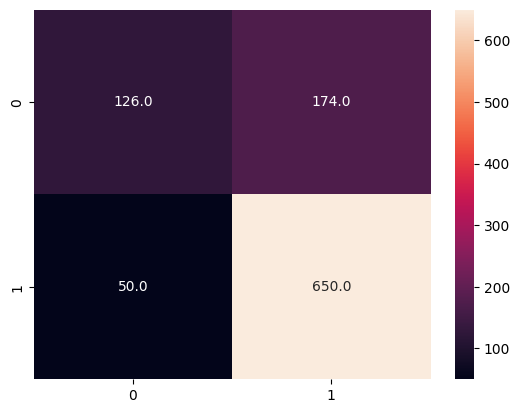

In [119]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, fmt=".1f")

Generar un curva de ROC

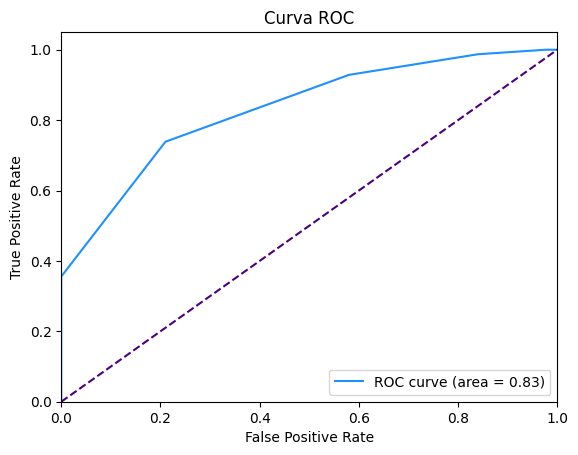

In [129]:
# prompt: Genere una corva de ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = modelo.predict_proba(x)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='dodgerblue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='indigo', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
